# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [3]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1) Read all files:

In [4]:
output_path = 'output/efficiencies'
mkdir_p(output_path)
version = 'v11'
ref = 'v9'

In [5]:
eff_data17_Zee_ref = restore_efficiencies( '../%s/output/emulation/data17_Zee_efficiency_%s.root'%(ref,ref))

In [6]:
eff_data17_Zee_ref.triggers

['HLT_e140_lhloose_nod0_ringer_v9',
 'HLT_e17_lhvloose_nod0_ringer_v9_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v9_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v9_L1EM24VHI']

In [7]:
eff_data17_Zee_test = restore_efficiencies( 'output/emulation/data17_Zee_efficiency_%s.root'%version)

In [8]:
eff_data17_Zee_test.triggers

['HLT_e140_lhloose_nod0_ringer_v11',
 'HLT_e17_lhvloose_nod0_ringer_v11_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v11_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v11_L1EM24VHI']

In [9]:
eff_data17_JF17_ref = restore_efficiencies( '../%s/output/emulation/data17_JF17_efficiency_%s.root'%(ref,ref))

In [10]:
eff_data17_JF17_test = restore_efficiencies( 'output/emulation/data17_JF17_efficiency_%s.root'%version)

In [11]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

In [12]:
legends = ['with Ringer (%s)'%version, 'with Ringer (%s)'%ref]

## 1) HLT_e17:

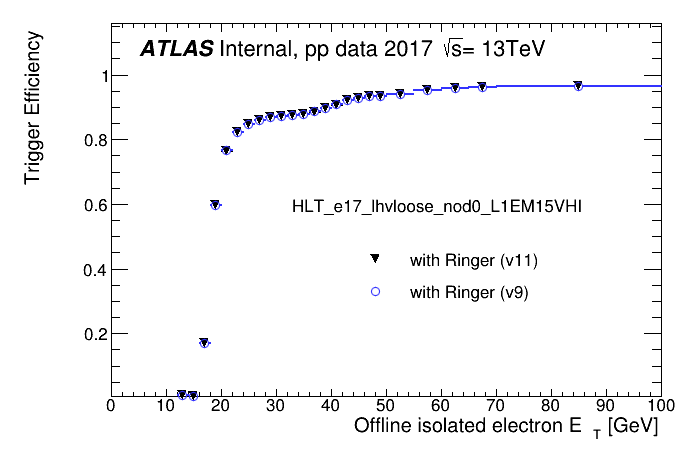

In [13]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_%s_2017_HLT_et.pdf'%version)

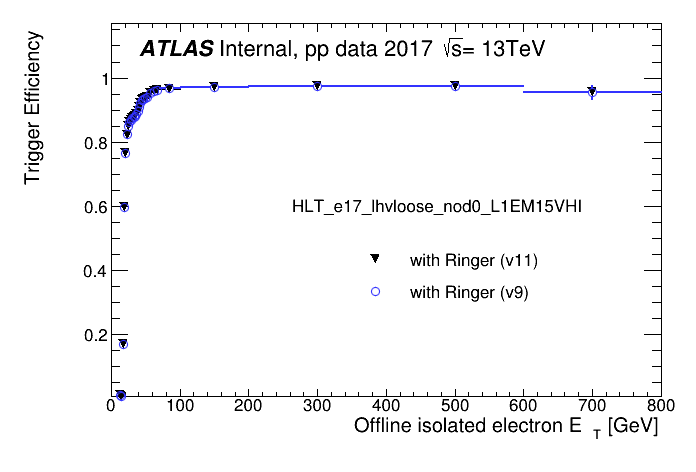

In [14]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_%s_2017_HLT_highet.pdf'%version)

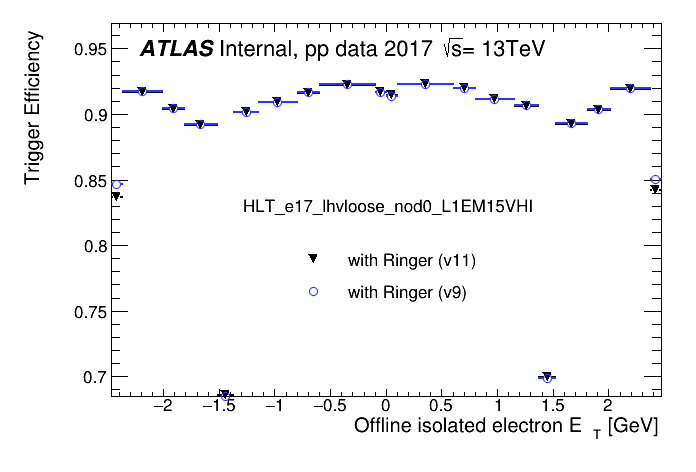

In [15]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.35, legends)
rpl.add_text( 0.35, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.05) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_%s_2017_HLT_eta.pdf'%version)

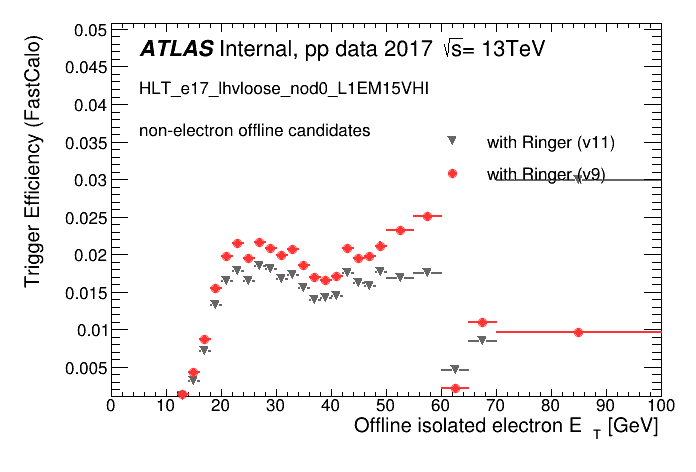

In [35]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'L2Calo','et'),
            eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.6,0.6, legends)
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM2_e17_ringer_%s_2017_L2Calo_et.pdf'%version)

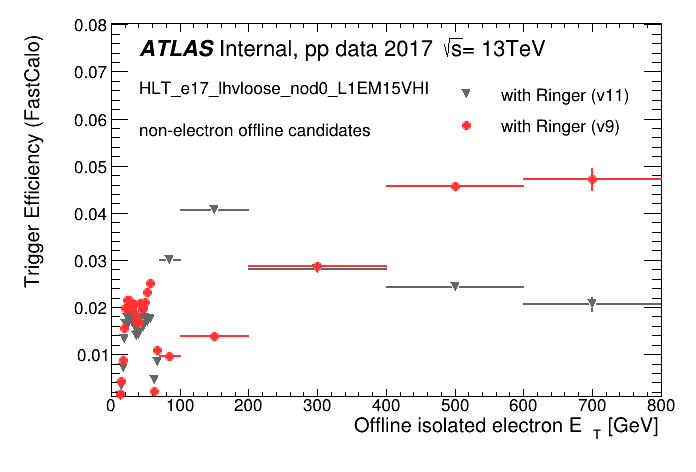

In [40]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'L2Calo','highet'),
            eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'L2Calo','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.62,0.7, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM2_e17_ringer_%s_2017_L2Calo_highet.pdf'%version)

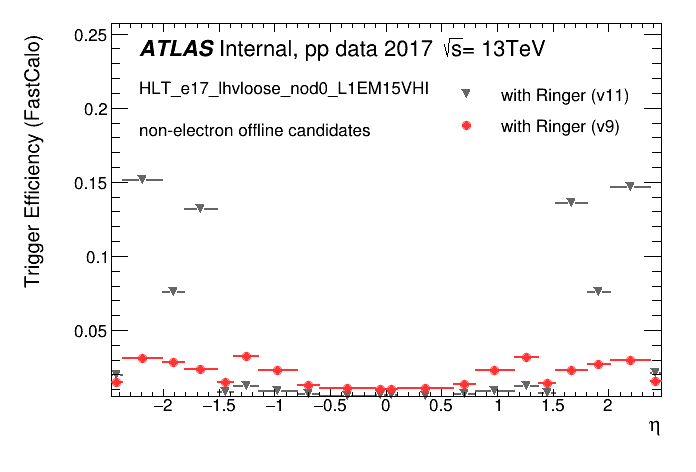

In [39]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%version, 'L2Calo','eta'),
            eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_ringer_%s_L1EM15VHI'%ref, 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.62,0.7, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM2_e17_ringer_%s_2017_L2Calo_eta.pdf'%version)

## 2) HLT_e28:

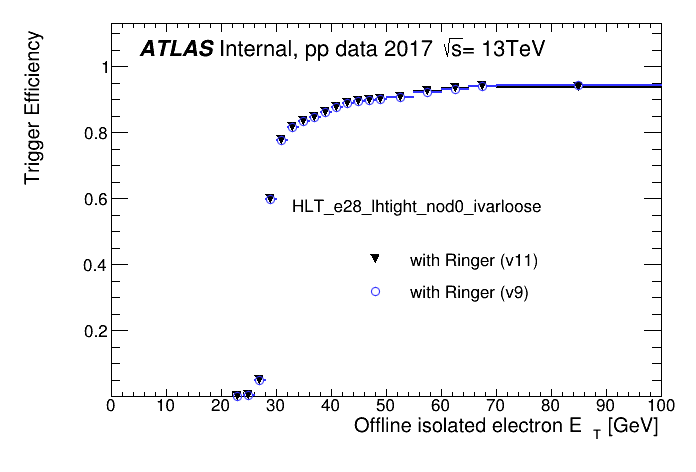

In [19]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_et.pdf'%version)

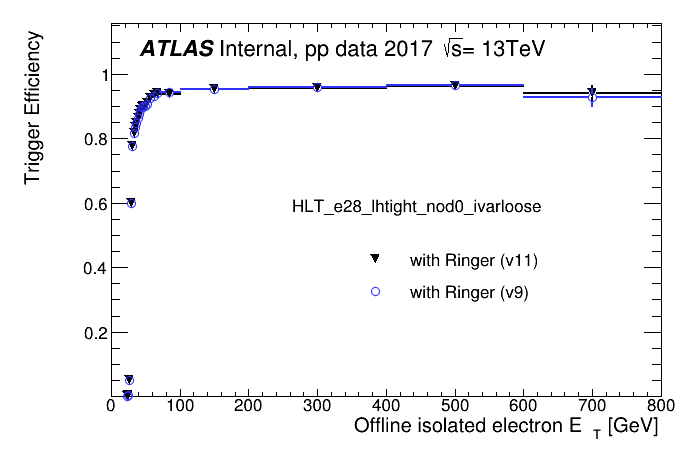

In [20]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,legends )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_highet.pdf'%version)

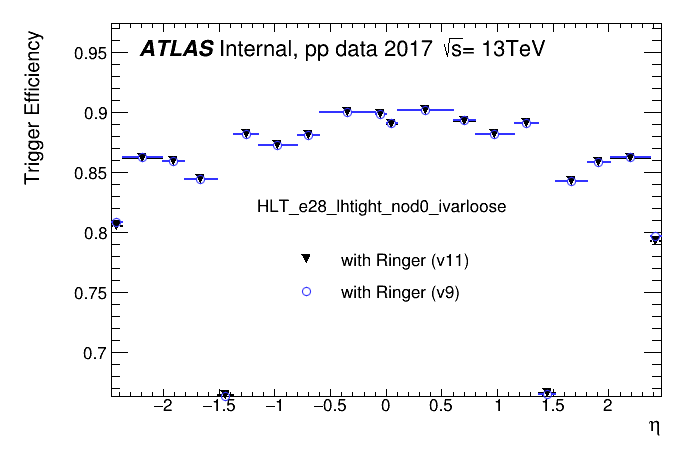

In [21]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,legends )
rpl.add_text( 0.37, 0.55, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.08) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_eta.pdf'%version)

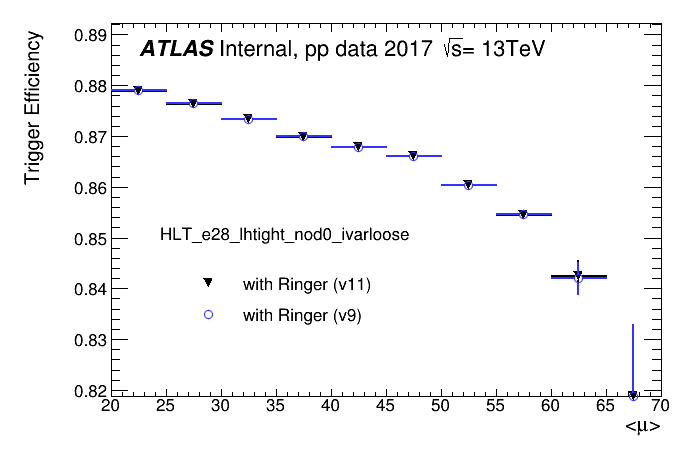

In [22]:
colors = [kBlack,kBlue-4]
markers = [23, 24]

hists = [
            eff_data17_Zee_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.3,legends )
rpl.add_text( 0.23, 0.49, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_%s_2017_HLT_mu.pdf'%version)


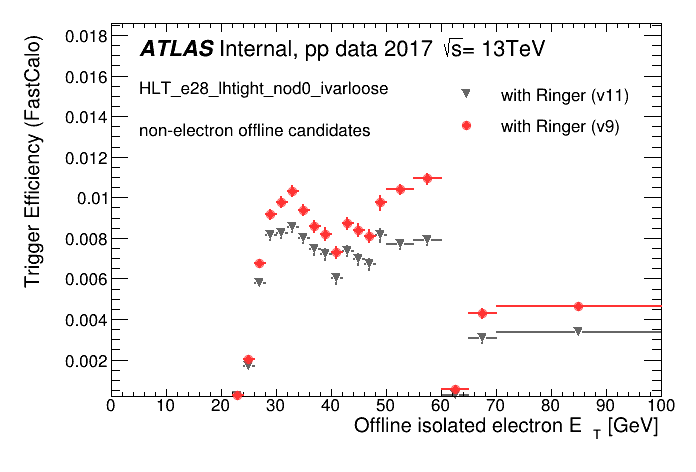

In [41]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','et'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','et'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.62, 0.7, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_et.pdf'%version)

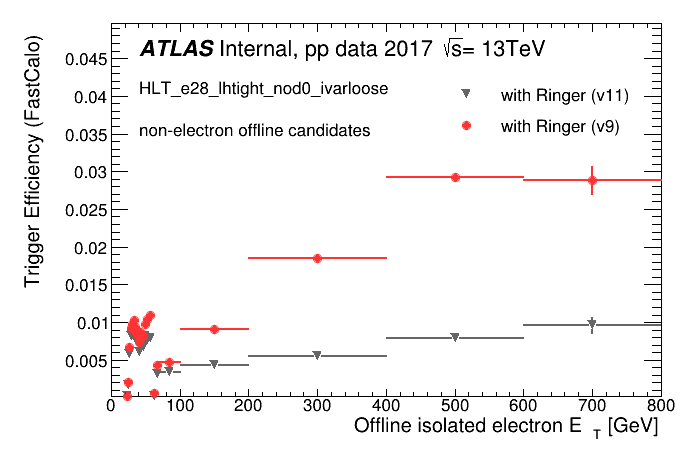

In [42]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','highet'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','highet'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.62, 0.7, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_highet.pdf'%version)

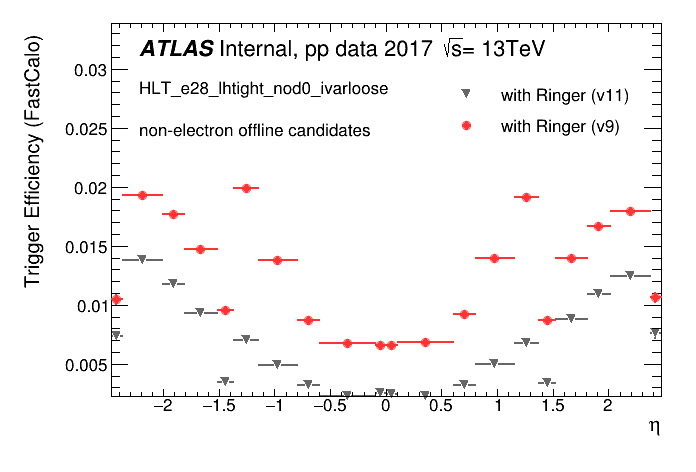

In [43]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','eta'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.62, 0.7, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_eta.pdf'%version)

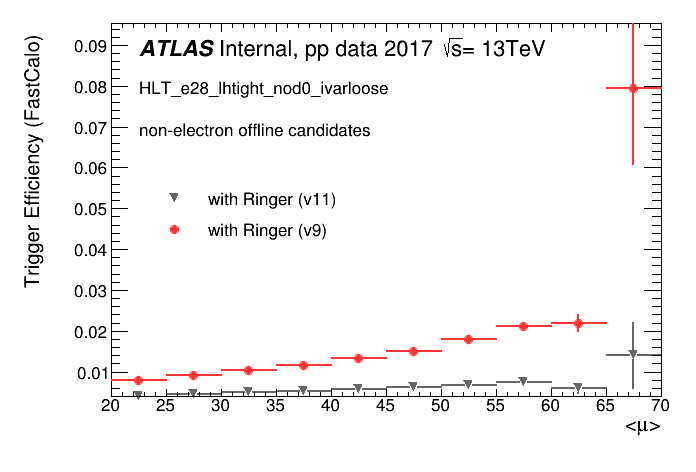

In [48]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%version, 'L2Calo','mu'),
            eff_data17_JF17_ref.profile('HLT_e28_lhtight_nod0_ringer_%s_ivarloose'%ref, 'L2Calo','mu'),
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.2, 0.48, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_%s_2017_L2Calo_mu.pdf'%version)

## 3) HLT_e60:

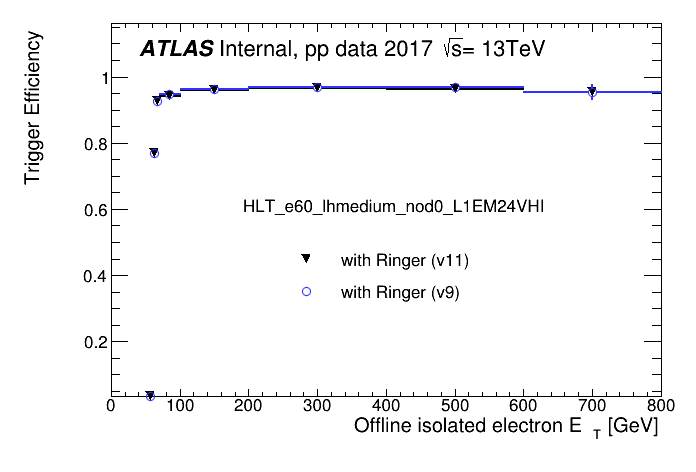

In [27]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,legends)
rpl.add_text( 0.35, 0.55, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_highet.pdf'%version)

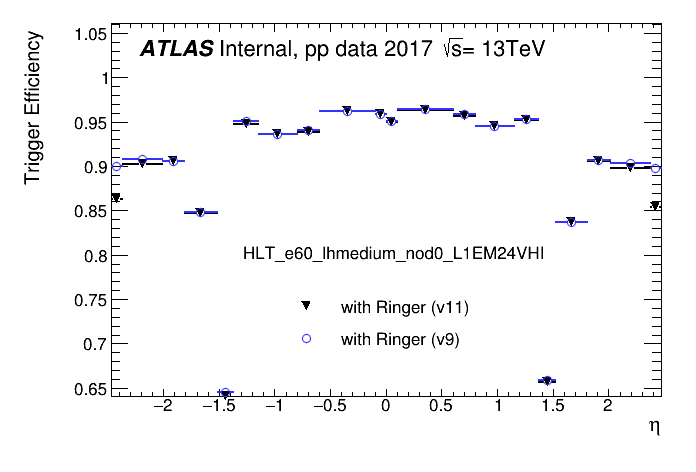

In [28]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,legends )
rpl.add_text( 0.35, 0.45, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_eta.pdf'%version)

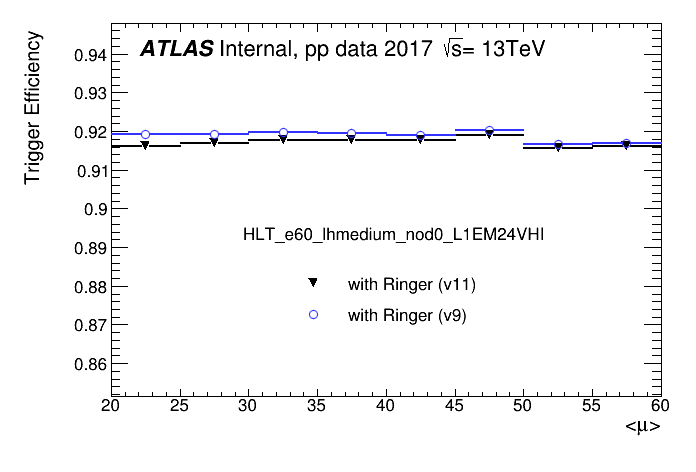

In [29]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.3,legends )
rpl.add_text( 0.35, 0.49, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.03, yminf=0.93) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_%s_2017_HLT_mu.pdf'%version)

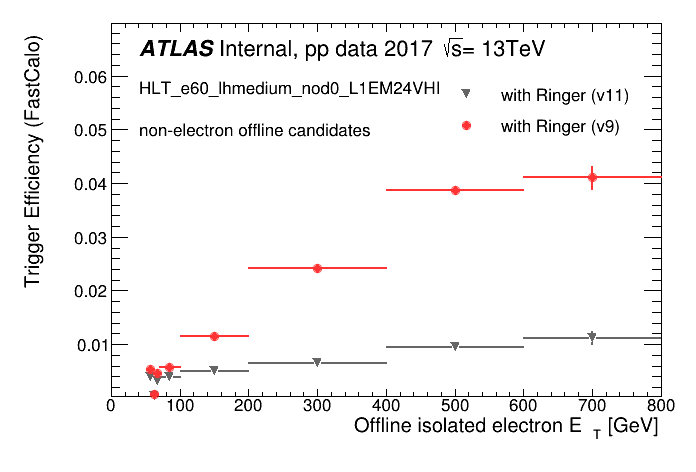

In [49]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%version, 'L2Calo','highet'),
            eff_data17_JF17_ref.profile('HLT_e60_lhmedium_nod0_ringer_%s_L1EM24VHI'%ref, 'L2Calo','highet'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e60_lhmedium_nod0_L1EM24VHI', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.62, 0.7, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.7 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e60_ringer_%s_2017_L2Calo_highet.pdf'%version)

## 4) HLT_e140:

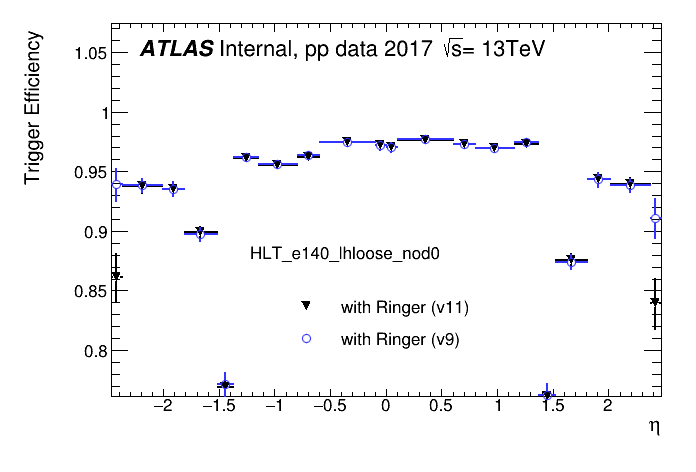

In [31]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_test.profile('HLT_e140_lhloose_nod0_ringer_%s'%version, 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e140_lhloose_nod0_ringer_%s'%ref, 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,legends )
rpl.add_text( 0.36, 0.45, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_%s_2017_HLT_eta.pdf'%version)

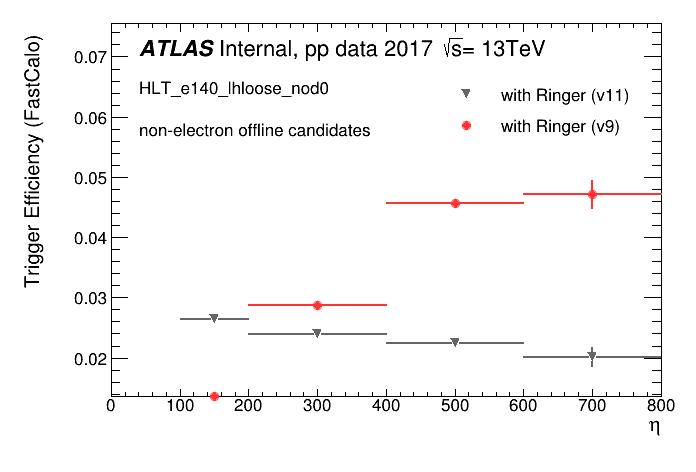

In [50]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_test.profile('HLT_e140_lhloose_nod0_ringer_%s'%version, 'L2Calo','highet'),
            eff_data17_JF17_ref.profile('HLT_e140_lhloose_nod0_ringer_%s'%ref, 'L2Calo','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e140_lhloose_nod0', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.62, 0.7, legends )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.6) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM2_e140_ringer_%s_2017_L2Calo_highet.pdf'%version)